# Mini-Batch K-Means

1. Wygeneruj losową próbkę danych przy użyciu funkcji `sklearn.datasets.make_blobs`, w dalszych testach użyj tej funkcji kilkukrotnie, aby wygenerować kilka różnych przykładów.

2. Pogrupuj te dane przy użyciu klasycznego algorytmu K-Means z [tej strony](https://github.com/IS-UMK/datamining_tutorial/blob/master/kmeans.ipynb).

3. Zaimplementuj naiwną funkcje Mini-Batch K-Means. Naiwna oznacza odpalenie zwykłego K-Means na podzbiorach i sumowanie najbliższych.

4. Zaimplementuj funkcje Mini-Batch K-Means z _listingu_ poniżej, pochodzi z [tej pracy](https://dl.acm.org/doi/pdf/10.1145/1772690.1772862). Funkcja `f` opisana jest właśnie w tej pracy.

5. Porównaj czasy wykonania  wszystkich trzech metod, jak szybko zbiega współczynnik _inertia_ ? _Inertia_ lub wewnątrz grupowa suma kwadratów, jest to kryterium, które optymalizuje K-Means.

![Wzór](images/Wzór.png)

![Algorytm](images/Algorytm.png)

In [314]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Ilość centroidów:
k=3;

# Ilość cech:
features=4;

# Wymiary box'a dla wartości:
box_x = -10.0;
box_y = 10.0;

# Wylosowanie próbek:
#   x - wygenerowane próbki (wymiar: n_samples x n_features),
#   y - etykiety przynależności do danej klasy wybranej próbki.
x, y = make_blobs(n_samples=10, n_features=features, centers=k, center_box=(box_x, box_y), random_state=0);

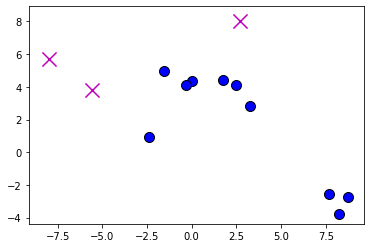

In [315]:
import numpy as np

# Początek implementacji algorytmu K-Means

# Wygenerowanie losowych centrów:
C = np.random.uniform(low=box_x, high=box_y, size=(k, features));

# Konfiguracja rozmiaru wykresu:
#plt.figure(figsize=(18, 16), dpi=80);

# Wyrysowanie próbek i centrów:
plt.scatter(x[:, 0], x[:, 1], marker='o', s=100, c='b', edgecolor='k');
plt.scatter(C.T[0], C.T[1], marker='x', s=200, c='m');

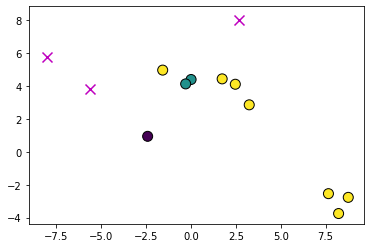

In [316]:
from scipy.spatial import distance

# Przypisanie - wersja długa:
s2id = np.zeros(len(x));
for i, s_i in enumerate(x):
    point = [x[i,:]];
    dists = []
    for c_i in C:
        dists.append(distance.euclidean(point, c_i));
    s2id[i] = np.argmin(dists);

# Konfiguracja rozmiaru wykresu:
#plt.figure(figsize=(18, 16), dpi=80);

# Wyrysowanie próbek i centrów:
plt.scatter(x[:, 0], x[:, 1], marker='o', s=100, c = s2id, edgecolor='k');
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='m');

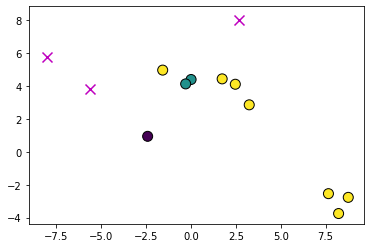

In [317]:
# Przypisanie - wersja krótka:
dists = distance.cdist(x, C, metric='euclidean');
s2id = np.argmin(dists, axis=1);

# Konfiguracja rozmiaru wykresu:
#plt.figure(figsize=(18, 16), dpi=80);

# Wyrysowanie próbek i centrów:
plt.scatter(x[:, 0], x[:, 1], marker='o', s=100, c = s2id, edgecolor='k');
plt.scatter(C.T[0], C.T[1], s=100, marker='x', c='m');